## Baseball Case Study

### Problem Statement:

#### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

#### -- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#### -- Output: Number of predicted wins (W)

#### To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

## Importing Library

In [2]:
# Analysising libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox

# Machine Learning library

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

## Extracting Dataset

In [8]:
df = pd.read_csv(r"C:\Users\ROHIT RAJAN\Downloads\baseball.txt")

In [9]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Illustration for Dataset

#### Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

In [11]:
# Checking any null value presends in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

### Creating heatmap for analysis..

<AxesSubplot:>

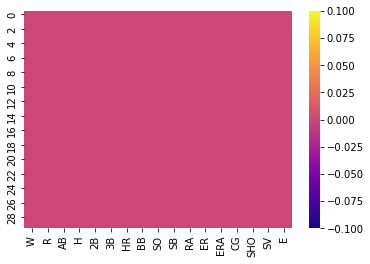

In [12]:
sns.heatmap(df.isnull(),cmap='plasma')

#### let's Visualize the data to check the null value heatmap plot is showing their is no null value present in the dataset

### Exploring Data Analysis

In [13]:
# Statiscal summary

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Observation

#### *In above description some of column having outlier and skewness.we will observe the data using some other techniques.

W        AxesSubplot(0.125,0.536818;0.133621x0.343182)
R     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
AB     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
H     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
2B    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
3B          AxesSubplot(0.125,0.125;0.133621x0.343182)
HR       AxesSubplot(0.285345,0.125;0.133621x0.343182)
BB        AxesSubplot(0.44569,0.125;0.133621x0.343182)
SO       AxesSubplot(0.606034,0.125;0.133621x0.343182)
SB       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

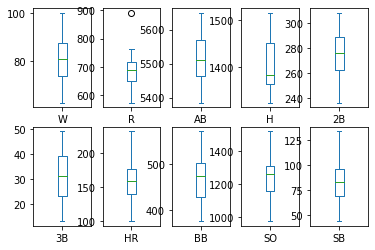

In [18]:
df.iloc[:,0:10].plot(kind='box',subplots=True,layout=(2,5))

RA        AxesSubplot(0.125,0.536818;0.133621x0.343182)
ER     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
ERA     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
CG     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
SHO    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
SV           AxesSubplot(0.125,0.125;0.133621x0.343182)
E         AxesSubplot(0.285345,0.125;0.133621x0.343182)
dtype: object

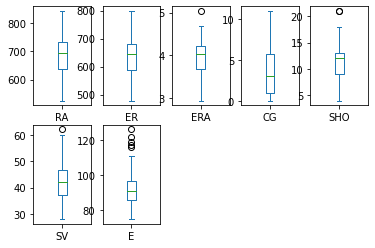

In [19]:
df.iloc[:,10:].plot(kind='box',subplots=True,layout=(2,5))

### Observation

##### 1.Below coulmn having outlier R,ERA,SHO,SV,E
##### 2.Some of the column very near to whisker SV,ERA,SHO
##### 3.Other Column dont have a outlier

### Univariant Analysis

<AxesSubplot:>

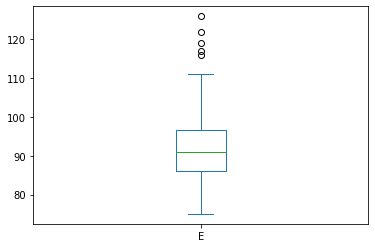

In [20]:
df['E'].plot(kind='box')

<AxesSubplot:>

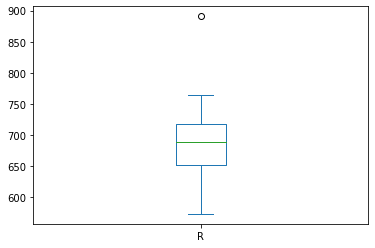

In [21]:
df['R'].plot(kind='box')

In [22]:
# Checking the skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

### Observation

##### As per standard their is some skewness present in R, H, CG, SHO, SV, E
##### We need to handle the skewness
##### Checking distribution plot for more detail.

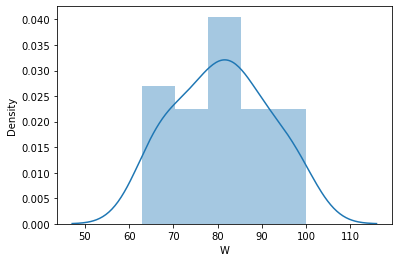

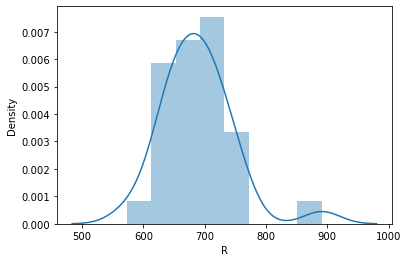

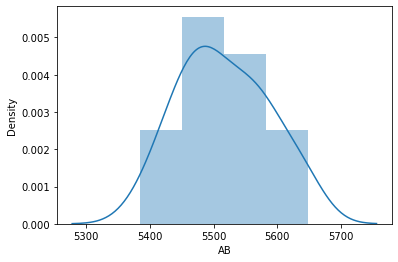

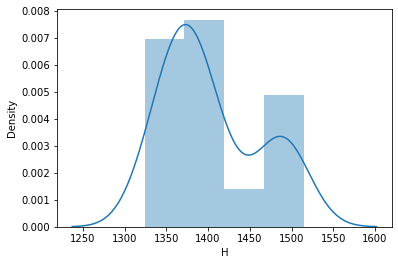

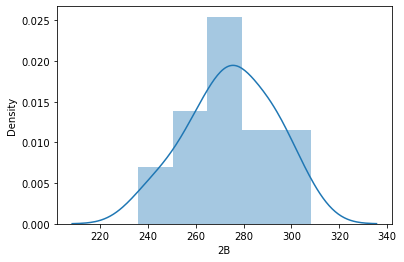

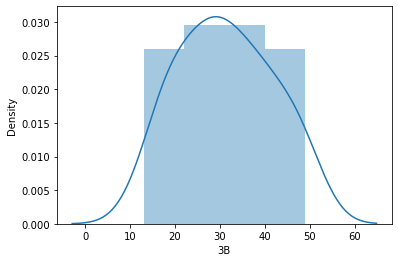

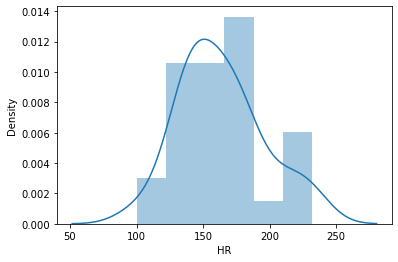

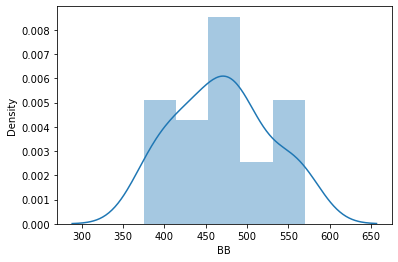

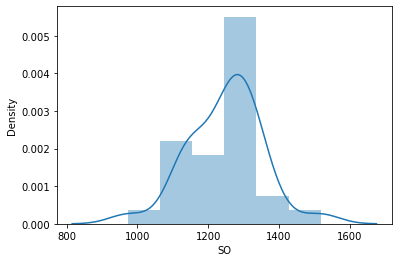

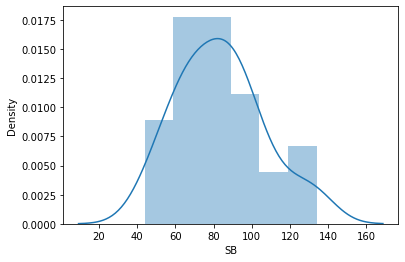

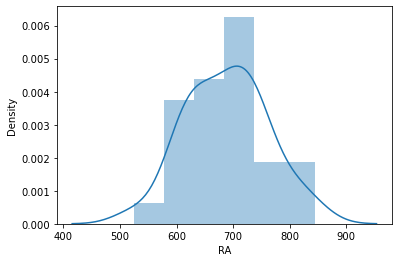

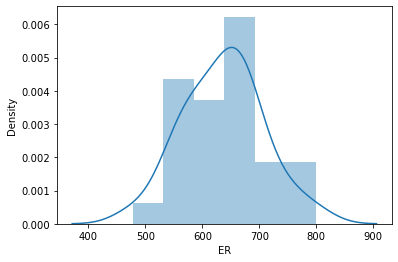

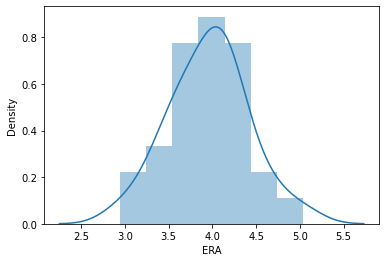

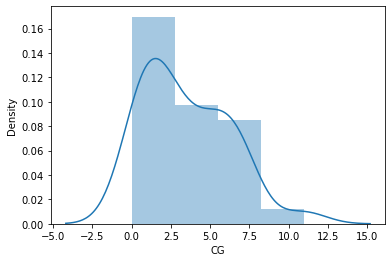

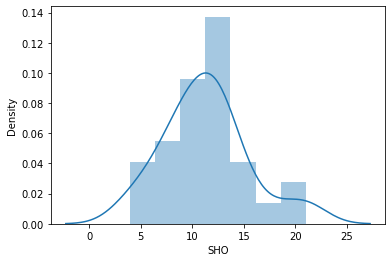

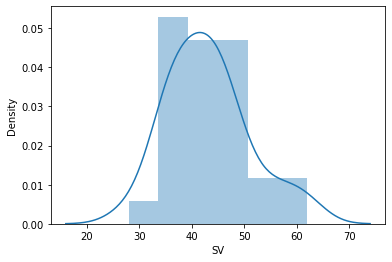

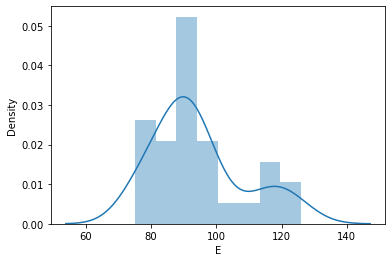

In [24]:
#Let's distribute the data
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

## Inspecting Correlation of data

In [70]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


### Observation

<AxesSubplot:>

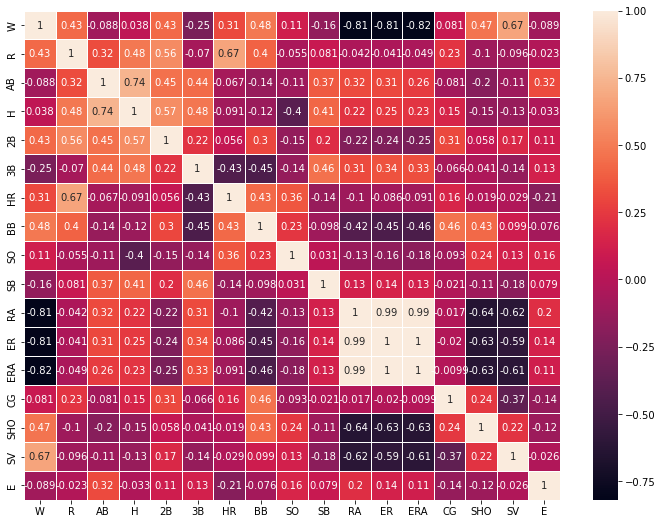

In [26]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)

### Observation

#### 1) RA ,ER,ERA is highly negative correlated with target class.

### Bivariant Analysis

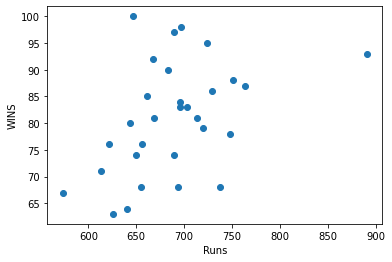

In [30]:
plt.scatter(df.R,df.W)
plt.xlabel("Runs")
plt.ylabel("WINS")
plt.show()

#### running realtion with dataset

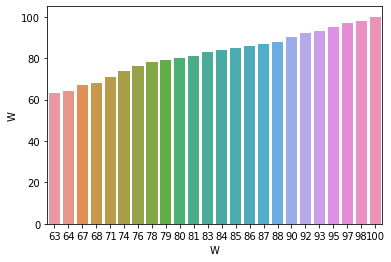

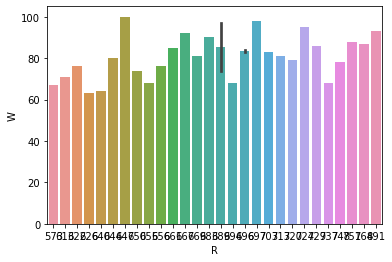

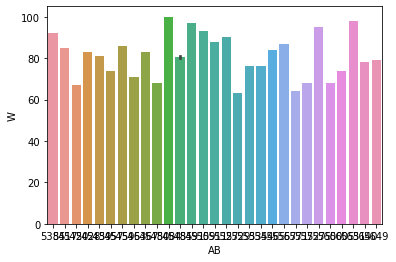

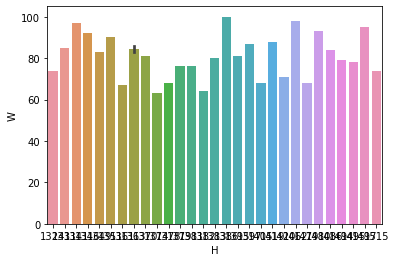

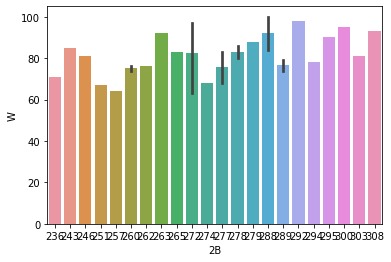

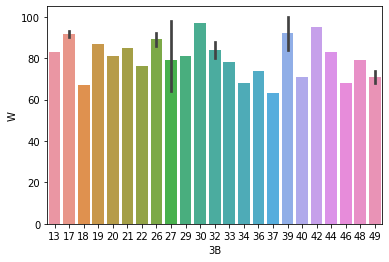

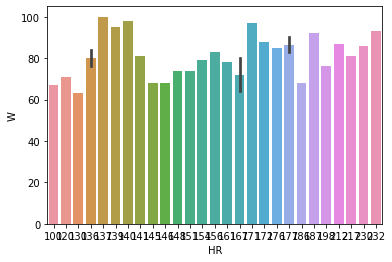

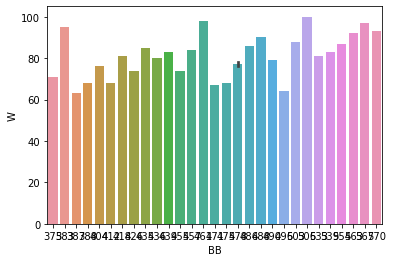

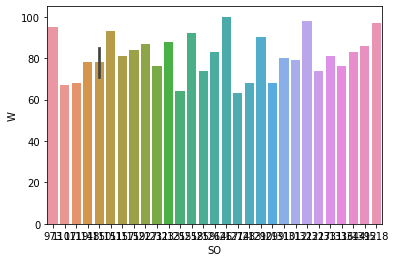

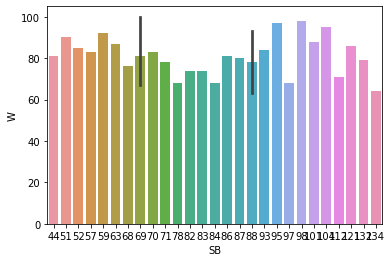

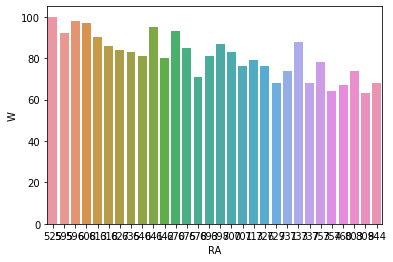

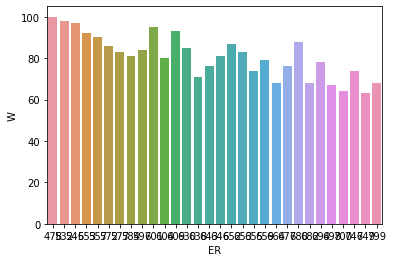

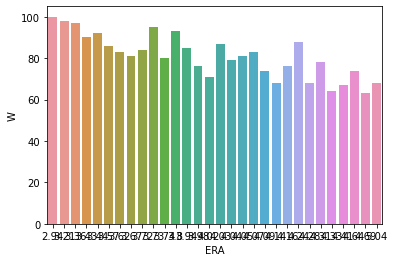

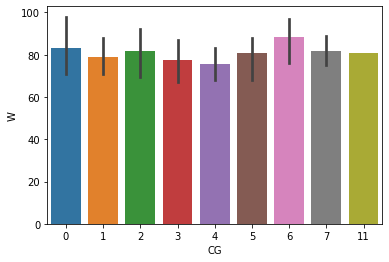

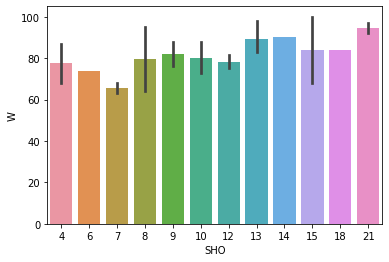

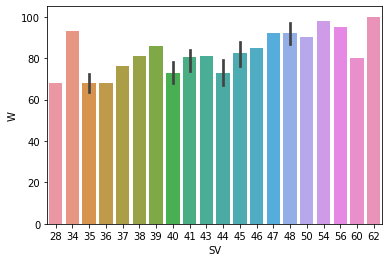

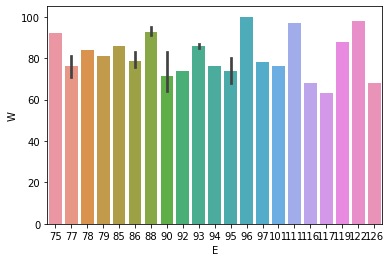

In [31]:
 
for i in df.columns:
    plt.figure()
    sns.barplot(x=df[i],y=df.W)

## Removing outlier from Data

In [32]:
z=np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [33]:
df_new = df[(z<3).all(axis=1)]

In [34]:
df.shape

(30, 17)

In [35]:
# Checking shape of new dataset
df_new.shape

(29, 17)

In [36]:
# Data we lost

(30-29)/30*100

3.3333333333333335

### Removing highly negative correlated column

In [37]:
df_new.drop(['RA','ER',],axis=1,inplace=True)

In [38]:
df_new.drop('ERA',axis=1,inplace=True)

### Spliting X and Y Data

In [39]:
x = df_new.iloc[:,1:-1]
y = df_new['W']

In [40]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV
0,724,5575,1497,300,42,139,383,973,104,2,8,56
1,696,5467,1349,277,44,156,439,1264,70,2,12,45
2,669,5439,1395,303,29,141,533,1157,86,11,10,38
3,622,5533,1381,260,27,136,404,1231,68,7,9,37
4,689,5605,1515,289,49,151,455,1259,83,7,12,35
6,764,5567,1397,272,19,212,554,1227,63,3,4,48
7,713,5485,1370,246,20,217,418,1331,44,0,10,43
8,644,5485,1383,278,32,167,436,1310,87,1,12,60
9,748,5640,1495,294,33,161,478,1148,71,3,10,40
10,751,5511,1419,279,32,172,503,1233,101,5,9,45


### Removing Skewness

In [41]:
df_x = power_transform(x)

df_x = pd.DataFrame(df_x)

In [42]:
x = df_x
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.307098,-0.787002,1.532753
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,-0.307098,0.236737,0.312020
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,2.011315,-0.252844,-0.664137
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,1.264463,-0.513555,-0.820689
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.264463,0.236737,-1.149165
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.121871,-2.064039,0.677176
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,-1.732896,-0.252844,0.052325
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.870682,0.236737,1.908137
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.121871,-0.252844,-0.365006
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.770649,-0.513555,0.312020


### Standard_Scaling

In [43]:
scalar = StandardScaler()
x = scalar.fit_transform(x)

## Finding best random state

In [44]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"Best random state :{i} and Train r2 score:{r2_score(y_train,pred_train)}")
    print(f"Best random state :{i} and Test r2 score:{r2_score(y_test,pred_test)}")
    print("")

Best random state :1 and Train r2 score:0.8550783206268826
Best random state :1 and Test r2 score:0.6944530201712394

Best random state :2 and Train r2 score:0.8173961865951549
Best random state :2 and Test r2 score:-0.8302730889884651

Best random state :3 and Train r2 score:0.8199055316941919
Best random state :3 and Test r2 score:0.7257992916491386

Best random state :4 and Train r2 score:0.8536067232046677
Best random state :4 and Test r2 score:0.618508188589969

Best random state :5 and Train r2 score:0.8806333789341638
Best random state :5 and Test r2 score:0.2671195820874026

Best random state :6 and Train r2 score:0.8800922107276878
Best random state :6 and Test r2 score:0.6629688959955353

Best random state :7 and Train r2 score:0.8488482103041881
Best random state :7 and Test r2 score:0.38500783612986544

Best random state :8 and Train r2 score:0.8368074421041336
Best random state :8 and Test r2 score:0.7888158307008533

Best random state :9 and Train r2 score:0.8917311638958

In [45]:
# Spliting test and training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=23)    


## LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)
prec =lr.predict(x_test)

##### Performance of model

In [47]:

def performance(actual,prec):
    print("error")                                                 
    print("Mean absolute error",mean_absolute_error(actual,prec))
    print("mean square error",mean_squared_error(actual,prec))
    print("R2 Score :",r2_score(actual,prec))

In [48]:
performance(y_test,prec)

error
Mean absolute error 4.03176543616171
mean square error 27.986463387272046
R2 Score : 0.8168010720568097


## CROSS Validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cross_ls = cross_val_score(LinearRegression(),x,y,cv=10)
cross_ls.mean()

-5.944004960197785

## Regularation Process

In [51]:
# lib
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [52]:
# Through alpha value it will be corrected as we will do below..
le =Lasso(alpha=0.0001)
le.fit(x_train,y_train)
predict = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,predict))


0.8168265237541109


## Cross Validation

In [53]:
cross_Val = cross_val_score(le,x,y,cv=10)
cross_Val.mean()

-5.943691740647567

In [54]:
# Ridge model anaysing..
rg =Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.8137232776132802

## Cross Validation

In [55]:
cross_Val = cross_val_score(rg,x,y,cv=10)
cross_Val.mean()

-5.943965765736464

In [56]:
# Elastic model
el=ElasticNet(alpha=0.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)

0.813723250735676

In [57]:
cross_Val = cross_val_score(el,x,y,cv=10)
cross_Val.mean()

-5.943337716598096

## Model - Some other model to handle dataset

In [58]:
from sklearn.svm import SVR

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernel:
    sr = SVR(kernel=i)
    sr.fit(x_train,y_train)
    print(sr.score(x_train,y_train))
    prec = sr.predict(x_test)
    print("error")
    print("Mean absolute error",mean_absolute_error(y_test,prec))
    print("mean square error",mean_squared_error(y_test,prec))
    cross_Val = cross_val_score(sr,x,y,cv=10)
    print("Cross validation",cross_Val.mean())
    print("")
    

0.6358537742904031
error
Mean absolute error 4.905212383464222
mean square error 36.600991604438946
Cross validation -7.021812327196119

0.3895161851925394
error
Mean absolute error 9.851454594487656
mean square error 140.93521519982315
Cross validation -5.847696092613174

0.19200226673928955
error
Mean absolute error 9.691732263925418
mean square error 138.04056011158093
Cross validation -6.54114430244923

0.2900438840905165
error
Mean absolute error 8.554165172205888
mean square error 117.30892833172064
Cross validation -4.160333456071724



## Hyper Parameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Lasso Regrssion param

param ={'alpha':[0.1,0.01,0.001,0.0001],
       'selection':['cyclic', 'random']}

In [61]:
lasso_hp = GridSearchCV(Lasso(),param,cv=5)
lasso_hp.fit(x_train,y_train)
lasso_hp.best_params_

{'alpha': 0.1, 'selection': 'random'}

In [62]:
# Through alpha value it will be corrected
le =Lasso(alpha=0.1,selection='random')
le.fit(x_train,y_train)
predict = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,predict))

0.8263878190278334


### ridge regresion param

In [67]:

param_r ={'alpha':[0.1,0.01,0.001,0.0001],
       'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [68]:
ridge_hp = GridSearchCV(Ridge(),param_r,cv=5)
ridge_hp.fit(x_train,y_train)
ridge_hp.best_params_

{'alpha': 0.1, 'solver': 'saga'}

### # Ridge model

In [65]:

rg =Ridge(alpha=0.1,solver ='saga')
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
predict = rg.predict(x_test)

print(r2_score(y_test,predict))

0.8158656708161696
